# BBC News Classification -NLP

Importing All The Necessary Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
BBC_News = pd.read_csv("News_dataset.csv",sep=';')

# Understanding The Data

In [3]:
BBC_News.head()

,File_Name,Content,Category,Complete_Filename
0,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,business,001.txt-business
1,002.txt,Dollar gains on Greenspan speech\n\nThe dollar...,business,002.txt-business
2,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,business,003.txt-business
3,004.txt,High fuel prices hit BA's profits\n\nBritish A...,business,004.txt-business
4,005.txt,Pernod takeover talk lifts Domecq\n\nShares in...,business,005.txt-business


In [4]:
BBC_News.tail()

,File_Name,Content,Category,Complete_Filename
2220,397.txt,BT program to beat dialler scams\n\nBT is intr...,tech,397.txt-tech
2221,398.txt,Spam e-mails tempt net shoppers\n\nComputer us...,tech,398.txt-tech
2222,399.txt,Be careful how you code\n\nA new European dire...,tech,399.txt-tech
2223,400.txt,US cyber security chief resigns\n\nThe man mak...,tech,400.txt-tech
2224,401.txt,Losing yourself in online gaming\n\nOnline rol...,tech,401.txt-tech


# Understanding Features and Target Variables

In [5]:
BBC_News['Category'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [6]:
BBC_News.shape

(2225, 4)

In [7]:
BBC_News.dtypes

File_Name            object
Content              object
Category             object
Complete_Filename    object
dtype: object

# Checking for NULL values

In [8]:
BBC_News.isnull().any()

File_Name            False
Content              False
Category             False
Complete_Filename    False
dtype: bool

# Countplot of Target Variable(Category)

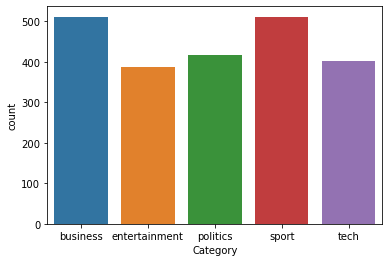

In [9]:
sns.countplot(BBC_News.Category)

In [10]:
BBC_News['News_length'] = BBC_News['Content'].str.len()
print(BBC_News['News_length'])

0        2559
1        2251
2        1551
3        2411
4        1569
        ...  
2220     2518
2221     2284
2222     6281
2223     2315
2224    16160
Name: News_length, Length: 2225, dtype: int64


# Distribution Plot

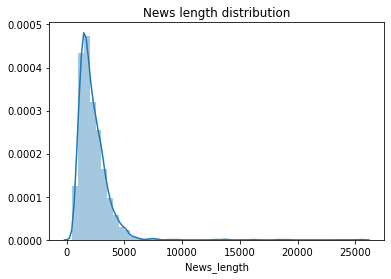

In [11]:
sns.distplot(BBC_News['News_length']).set_title('News length distribution');

# WordCloud

In [12]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


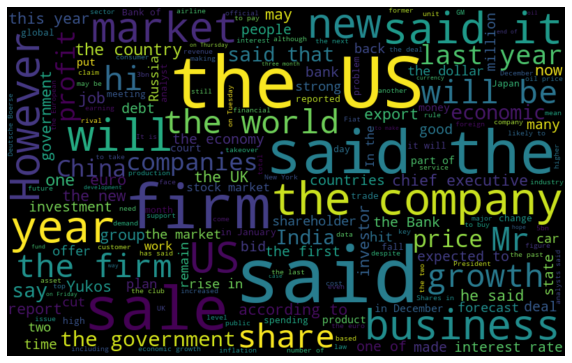

In [13]:
subset=BBC_News[BBC_News.Category=="business"]
text=subset.Content.values
words =" ".join(text)
create_wordcloud(words)

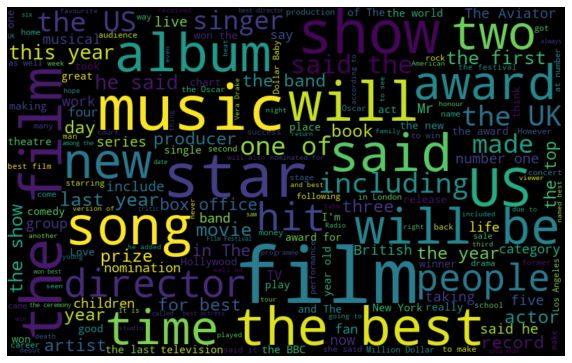

In [14]:
subset=BBC_News[BBC_News.Category=="entertainment"]
text=subset.Content.values
words =" ".join(text)
create_wordcloud(words)

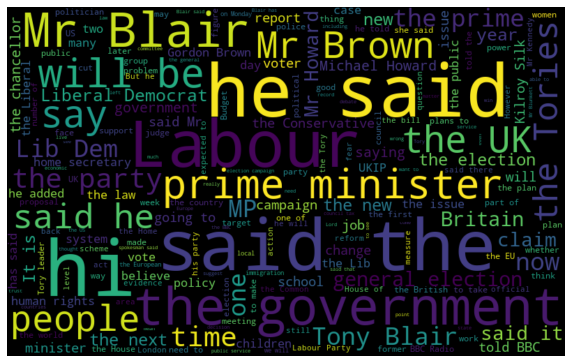

In [15]:
subset=BBC_News[BBC_News.Category=="politics"]
text=subset.Content.values
words =" ".join(text)
create_wordcloud(words)


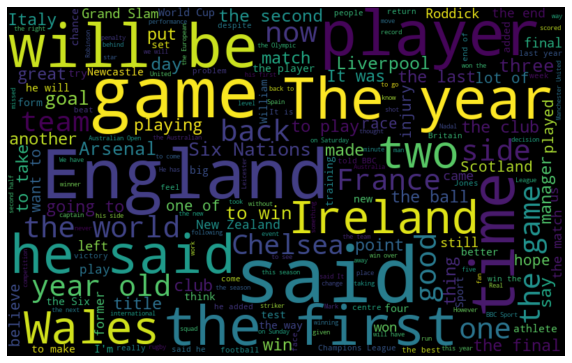

In [16]:
subset=BBC_News[BBC_News.Category=="sport"]
text=subset.Content.values
words =" ".join(text)
create_wordcloud(words)

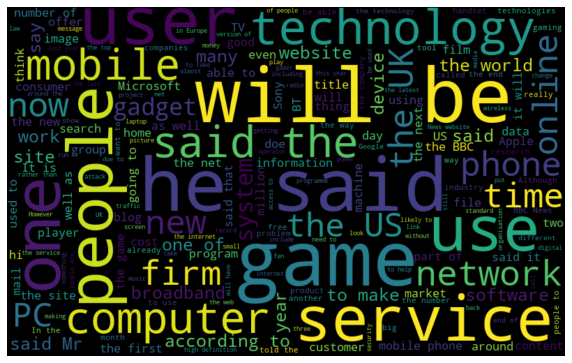

In [17]:
subset=BBC_News[BBC_News.Category=="tech"]
text=subset.Content.values
words =" ".join(text)
create_wordcloud(words)

# Feature Engineering

By analysing the dataset, we can see there are special characters

Removing the special characters

1) \r
2) \n

In [18]:
BBC_News['Content_Parsed_1'] = BBC_News['Content'].str.replace("\r", " ")
BBC_News['Content_Parsed_1'] = BBC_News['Content_Parsed_1'].str.replace("\n", " ")
BBC_News['Content_Parsed_1'] = BBC_News['Content_Parsed_1'].str.replace("    ", " ")

In [19]:
BBC_News.head()

,File_Name,Content,Category,Complete_Filename,News_length,Content_Parsed_1
0,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,business,001.txt-business,2559,Ad sales boost Time Warner profit Quarterly p...
1,002.txt,Dollar gains on Greenspan speech\n\nThe dollar...,business,002.txt-business,2251,Dollar gains on Greenspan speech The dollar h...
2,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,business,003.txt-business,1551,Yukos unit buyer faces loan claim The owners ...
3,004.txt,High fuel prices hit BA's profits\n\nBritish A...,business,004.txt-business,2411,High fuel prices hit BA's profits British Air...
4,005.txt,Pernod takeover talk lifts Domecq\n\nShares in...,business,005.txt-business,1569,Pernod takeover talk lifts Domecq Shares in U...


In [20]:
BBC_News.tail()

,File_Name,Content,Category,Complete_Filename,News_length,Content_Parsed_1
2220,397.txt,BT program to beat dialler scams\n\nBT is intr...,tech,397.txt-tech,2518,BT program to beat dialler scams BT is introd...
2221,398.txt,Spam e-mails tempt net shoppers\n\nComputer us...,tech,398.txt-tech,2284,Spam e-mails tempt net shoppers Computer user...
2222,399.txt,Be careful how you code\n\nA new European dire...,tech,399.txt-tech,6281,Be careful how you code A new European direct...
2223,400.txt,US cyber security chief resigns\n\nThe man mak...,tech,400.txt-tech,2315,US cyber security chief resigns The man makin...
2224,401.txt,Losing yourself in online gaming\n\nOnline rol...,tech,401.txt-tech,16160,Losing yourself in online gaming Online role ...


In [21]:
BBC_News['Content_Parsed_1'] = BBC_News['Content_Parsed_1'].str.replace('"', '')

In [22]:
BBC_News['Content_Parsed_2'] = BBC_News['Content_Parsed_1'].str.lower()

# Removing Stopwords

In [23]:
punctuation_signs = list("?:!.,;")
BBC_News['Content_Parsed_3'] = BBC_News['Content_Parsed_2']

for punct_sign in punctuation_signs:
    BBC_News['Content_Parsed_3'] =BBC_News['Content_Parsed_3'].str.replace(punct_sign, '')

In [24]:
BBC_News['Content_Parsed_4'] = BBC_News['Content_Parsed_3'].str.replace("'s", "")

# Word Lemmatization

In [25]:
wordnet_lemmatizer = WordNetLemmatizer()

In [26]:
nrows = len(BBC_News)
lemmatized_text_list = []

for row in range(0, nrows):
    
    lemmatized_list = []
    
    text = BBC_News.loc[row]['Content_Parsed_4']
    text_words = text.split(" ")
    

    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    lemmatized_text = " ".join(lemmatized_list)
    
    lemmatized_text_list.append(lemmatized_text)

In [27]:
BBC_News['Content_Parsed_5'] = lemmatized_text_list

# Removing Stopwords

In [28]:
stop_words = list(stopwords.words('english'))

In [29]:
BBC_News['Content_Parsed_6'] = BBC_News['Content_Parsed_5']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    BBC_News['Content_Parsed_6'] = BBC_News['Content_Parsed_6'].str.replace(regex_stopword, '')

In [30]:
BBC_News.head(5)

,File_Name,Content,Category,Complete_Filename,News_length,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3,Content_Parsed_4,Content_Parsed_5,Content_Parsed_6
0,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,business,001.txt-business,2559,Ad sales boost Time Warner profit Quarterly p...,ad sales boost time warner profit quarterly p...,ad sales boost time warner profit quarterly p...,ad sales boost time warner profit quarterly p...,ad sales boost time warner profit quarterly p...,ad sales boost time warner profit quarterly p...
1,002.txt,Dollar gains on Greenspan speech\n\nThe dollar...,business,002.txt-business,2251,Dollar gains on Greenspan speech The dollar h...,dollar gains on greenspan speech the dollar h...,dollar gains on greenspan speech the dollar h...,dollar gains on greenspan speech the dollar h...,dollar gain on greenspan speech the dollar ha...,dollar gain greenspan speech dollar hit h...
2,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,business,003.txt-business,1551,Yukos unit buyer faces loan claim The owners ...,yukos unit buyer faces loan claim the owners ...,yukos unit buyer faces loan claim the owners ...,yukos unit buyer faces loan claim the owners ...,yukos unit buyer face loan claim the owners o...,yukos unit buyer face loan claim owners emb...
3,004.txt,High fuel prices hit BA's profits\n\nBritish A...,business,004.txt-business,2411,High fuel prices hit BA's profits British Air...,high fuel prices hit ba's profits british air...,high fuel prices hit ba's profits british air...,high fuel prices hit ba profits british airwa...,high fuel price hit ba profit british airways...,high fuel price hit ba profit british airways...
4,005.txt,Pernod takeover talk lifts Domecq\n\nShares in...,business,005.txt-business,1569,Pernod takeover talk lifts Domecq Shares in U...,pernod takeover talk lifts domecq shares in u...,pernod takeover talk lifts domecq shares in u...,pernod takeover talk lifts domecq shares in u...,pernod takeover talk lift domecq share in uk ...,pernod takeover talk lift domecq share uk dr...


# Label Encoding

In [31]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
BBC_News['Category']= label_encoder.fit_transform(BBC_News['Category'])

In [32]:
BBC_News.head()

,File_Name,Content,Category,Complete_Filename,News_length,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3,Content_Parsed_4,Content_Parsed_5,Content_Parsed_6
0,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,0,001.txt-business,2559,Ad sales boost Time Warner profit Quarterly p...,ad sales boost time warner profit quarterly p...,ad sales boost time warner profit quarterly p...,ad sales boost time warner profit quarterly p...,ad sales boost time warner profit quarterly p...,ad sales boost time warner profit quarterly p...
1,002.txt,Dollar gains on Greenspan speech\n\nThe dollar...,0,002.txt-business,2251,Dollar gains on Greenspan speech The dollar h...,dollar gains on greenspan speech the dollar h...,dollar gains on greenspan speech the dollar h...,dollar gains on greenspan speech the dollar h...,dollar gain on greenspan speech the dollar ha...,dollar gain greenspan speech dollar hit h...
2,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,0,003.txt-business,1551,Yukos unit buyer faces loan claim The owners ...,yukos unit buyer faces loan claim the owners ...,yukos unit buyer faces loan claim the owners ...,yukos unit buyer faces loan claim the owners ...,yukos unit buyer face loan claim the owners o...,yukos unit buyer face loan claim owners emb...
3,004.txt,High fuel prices hit BA's profits\n\nBritish A...,0,004.txt-business,2411,High fuel prices hit BA's profits British Air...,high fuel prices hit ba's profits british air...,high fuel prices hit ba's profits british air...,high fuel prices hit ba profits british airwa...,high fuel price hit ba profit british airways...,high fuel price hit ba profit british airways...
4,005.txt,Pernod takeover talk lifts Domecq\n\nShares in...,0,005.txt-business,1569,Pernod takeover talk lifts Domecq Shares in U...,pernod takeover talk lifts domecq shares in u...,pernod takeover talk lifts domecq shares in u...,pernod takeover talk lifts domecq shares in u...,pernod takeover talk lift domecq share in uk ...,pernod takeover talk lift domecq share uk dr...


# Split the data in Training and testing

In [33]:
X_train, X_test, y_train, y_test = train_test_split(BBC_News['Content_Parsed_6'], 
                                                    BBC_News['Category'], 
                                                    test_size=0.2, 
                                                    random_state=8)

In [34]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300


In [35]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)


(1780, 300)
(445, 300)


# Building Models

In [36]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9325842696629213
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       118
           1       0.93      0.88      0.90        75
           2       0.94      0.89      0.92        85
           3       0.97      0.96      0.96        91
           4       0.95      0.96      0.95        76

    accuracy                           0.93       445
   macro avg       0.94      0.93      0.93       445
weighted avg       0.93      0.93      0.93       445



In [37]:
model = LogisticRegression()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9415730337078652
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       118
           1       0.93      0.95      0.94        75
           2       0.95      0.89      0.92        85
           3       0.98      0.98      0.98        91
           4       0.91      0.93      0.92        76

    accuracy                           0.94       445
   macro avg       0.94      0.94      0.94       445
weighted avg       0.94      0.94      0.94       445



In [38]:
model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9258426966292135
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       118
           1       0.94      0.89      0.92        75
           2       0.91      0.91      0.91        85
           3       0.98      0.98      0.98        91
           4       0.87      0.95      0.91        76

    accuracy                           0.93       445
   macro avg       0.93      0.93      0.93       445
weighted avg       0.93      0.93      0.93       445



In [39]:
model = DecisionTreeClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8157303370786517
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       118
           1       0.74      0.79      0.76        75
           2       0.78      0.75      0.77        85
           3       0.85      0.90      0.88        91
           4       0.86      0.86      0.86        76

    accuracy                           0.82       445
   macro avg       0.81      0.82      0.81       445
weighted avg       0.82      0.82      0.82       445



In [40]:
model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8898876404494382
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       118
           1       0.85      0.81      0.83        75
           2       0.90      0.87      0.89        85
           3       0.98      0.95      0.96        91
           4       0.80      0.93      0.86        76

    accuracy                           0.89       445
   macro avg       0.89      0.89      0.89       445
weighted avg       0.89      0.89      0.89       445

